#Classification en Machine Learning - DTS IMRT (S1, UE 3.1)

In [2]:
#Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

**Partie 1 - Illustration d'un problème de classification**

Une population de 100 patients a subi un test expérimental d'une maladie, dont le résultat est un score chiffré compris entre 0 et 10. On a par ailleurs identifié, indépendamment de ce test, les patients étant réellement malade (1) et les patients sains (0). L'objectif est d'évaluer l'aptitude de ce test à correctement identifier la maladie.

In [3]:
#Importation du fichier de données
data = pd.read_excel("algo_classification_tp.xlsx")
data.columns = ["Patient", "Score", "Status"]

In [4]:
#Obtention de la prévalence de la maladie dans la population
prevalence = data["Status"].mean()
print(f"Prévalence de la maladie dans la population : {prevalence * 100:.2f} %")

Prévalence de la maladie dans la population : 47.00 %


In [5]:
#Définition d'une fonction permettant de calculer la sensibilité, la spécificité et la VPP
def calculate_metrics(threshold, scores, true_labels):
  predictions = (scores >= threshold).astype(int)
  tn, fp, fn, tp = confusion_matrix(true_labels, predictions).ravel()
  sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0                      #Sensibilité
  specificity = tn / (tn + fp) if (tn + fp) > 0 else 0                      #Spécificité
  vpp = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0   #VPP
  return sensitivity, specificity, vpp

Choisis un seuil de décision (entre 0 et 10) pour le test positif : 14
Hé ho, on a dit entre 0 et 10 !
Choisis un seuil de décision (entre 0 et 10) pour le test positif : 7
Seuil choisi : 7.00
Sensibilité : 72.34 %
Spécificité : 98.11 %
Accuracy : 86.00 %


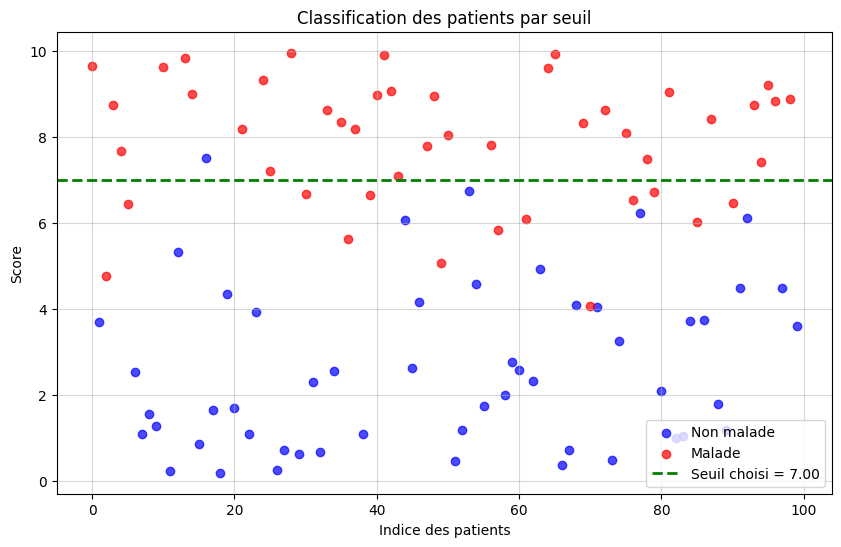

In [7]:
#Boîte de dialogue pour choisir le seuil de décision
threshold = None
while threshold is None:
  try:
    user_input = input("Choisis un seuil de décision (entre 0 et 10) pour le test positif : ")
    threshold = float(user_input)
    if 0 <= threshold <= 10:
      print(f"Seuil choisi : {threshold:.2f}")
    else:
      print("Hé ho, on a dit entre 0 et 10 !")
      threshold = None
  except ValueError:
    print("Hé ho, on a dit entre 0 et 10 !")

#Obtention des valeurs de sensibilité, spécificité et valeur prédictive positive pour le seuil choisi
sensitivity, specificity, vpp = calculate_metrics(threshold, data["Score"], data["Status"])
print(f"Sensibilité : {100 * sensitivity:.2f} %")
print(f"Spécificité : {100 * specificity:.2f} %")
print(f"Accuracy : {100 * vpp:.2f} %")

#Visualisation des données avec le seuil choisi
plt.figure(figsize=(10,6))
plt.scatter(data[data["Status"] == 0].index, data[data["Status"] == 0]["Score"], label="Non malade", color='blue', alpha=0.7)
plt.scatter(data[data["Status"] == 1].index, data[data["Status"] == 1]["Score"], label="Malade", color='red', alpha=0.7)
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=2, label=f"Seuil choisi = {threshold:.2f}")
plt.title("Classification des patients par seuil")
plt.xlabel("Indice des patients")
plt.ylabel("Score")
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()

**Partie 2 - Algorithme de prédiction**

En effectuant une séparation des données en données d'entraînement (80%) et en données-test (20%) et en appliquant un algorithme de Machine Learning aux données d'entraînement, on peut obtenir un modèle prédictif du caractère malade ou non des patients à partir de leur score au test. C'est ce qu'on illustre dans cette partie.

In [ ]:
#Splitting des données en données d'entraînement et données-test
x = data["Score"].values.reshape(-1,1)    #La variable d'entrée est le score au test
y = data["Status"].values                 #La variable de sortie est le statut malade ou non-malade

#Train-Test Split (80% des données dans le set d'entraînement, 20% dans le set de test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Modèle de régression logistique (Machine Learning)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

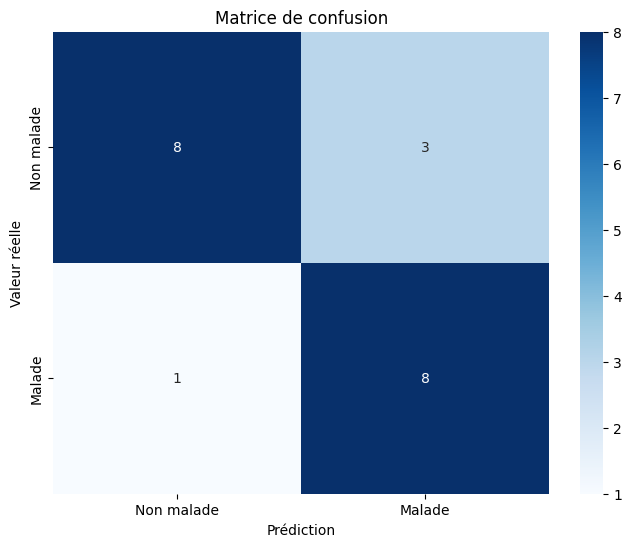


Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



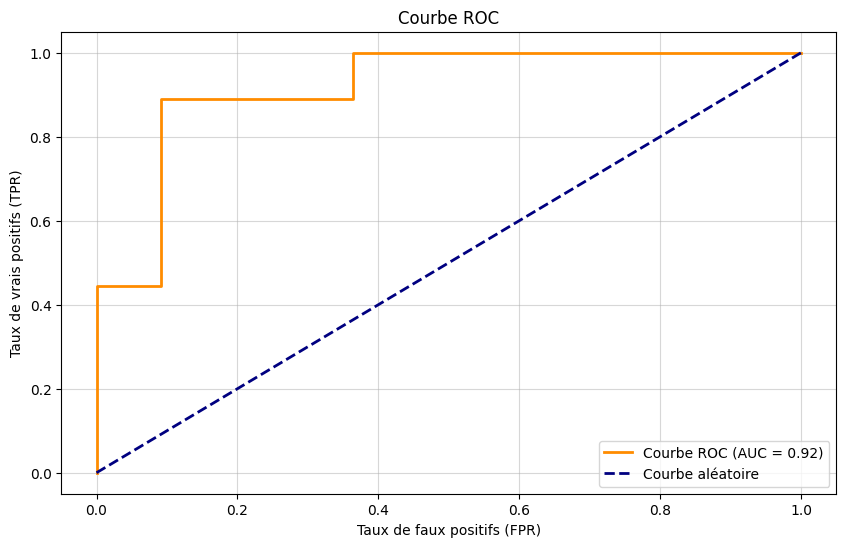

In [ ]:
#Prédictions sur les données test
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:,1]    #Probabilité de la classe 1 (malades)

#Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non malade", "Malade"], yticklabels=["Non malade", "Malade"])
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.title("Matrice de confusion")
plt.show()

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

#Affichage d'une courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Courbe ROC (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle='--', label="Courbe aléatoire")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()

**Partie 3 - Légère complexification du modèle**

L'intérêt d'utiliser un modèle de Machine Learning sur une situation ne dépendant qu'une seule variable a un intérêt limité. On peut par exemple penser que l'âge des patients peut avoir une influence sur le risque de pathologie. On ajoute donc, en plus du score du test, l'âge du patient comme variable, ce qui fait que l'algorithme de prédiction va maintenant devoir se baser sur deux paramètres d'entrée au lieu d'un seul.

In [ ]:
#Importation du fichier de données
data2 = pd.read_excel("algo_classification_age_tp.xlsx")
data2.columns = ["Patient", "Score", "Age", "Status"]

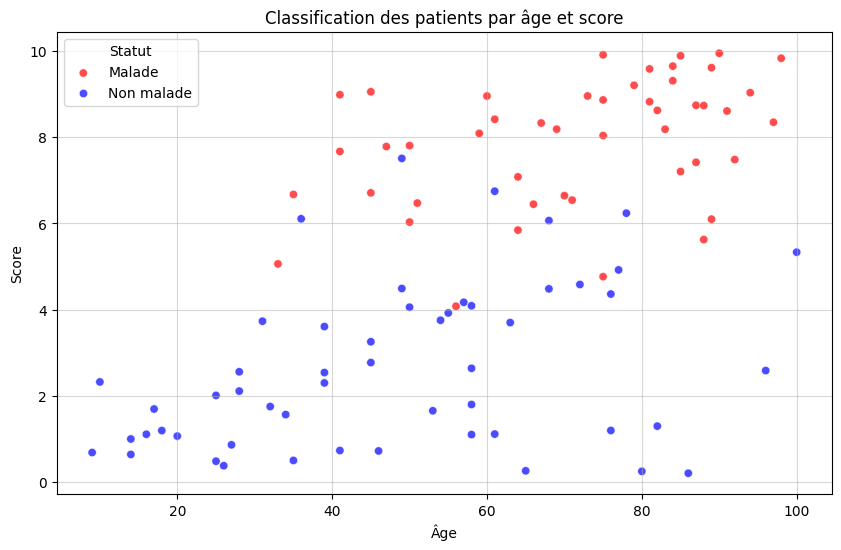

In [ ]:
#Visualisation des données
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=data2["Age"],
    y=data2["Score"],
    hue=data2["Status"],
    palette={0: "blue", 1: "red"},
    alpha=0.7
)
plt.title("Classification des patients par âge et score")
plt.xlabel("Âge")
plt.ylabel("Score")
plt.legend(title="Statut", labels=["Malade", "Non malade"], loc="upper left")
plt.grid(alpha=0.5)
plt.show()

In [ ]:
#Variables d'entrée et de sortie
x2 = data2[["Score", "Age"]].values
y2 = data2["Status"].values

#Splitting des données (80% dans le set d'entraînement, 20% dans le set de test)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

#Standardisation des données (afin que chaque paramètre d'entrée ait initialement le même poids vis-à-vis du modèle)
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

In [ ]:
#Modèles de régression logisitique disponibles (Machine Learning)
dt_model2 = DecisionTreeClassifier()
rf_model2 = RandomForestClassifier()
knn_model2 = KNeighborsClassifier()
lr_model2 = LogisticRegression()

#Choix du modèle à appliquer pour la prochaine exécution du code
model2 = lr_model2

#Application du modèle aux données d'entraînement
model2.fit(x_train2, y_train2)

LogisticRegression()

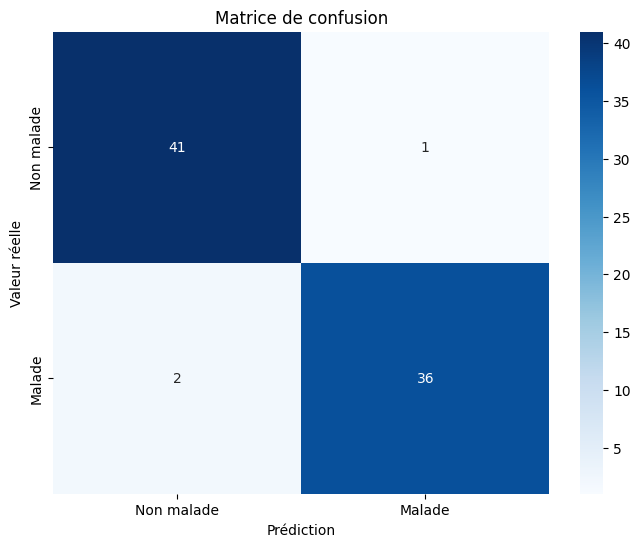


Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.97      0.95      0.96        38

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



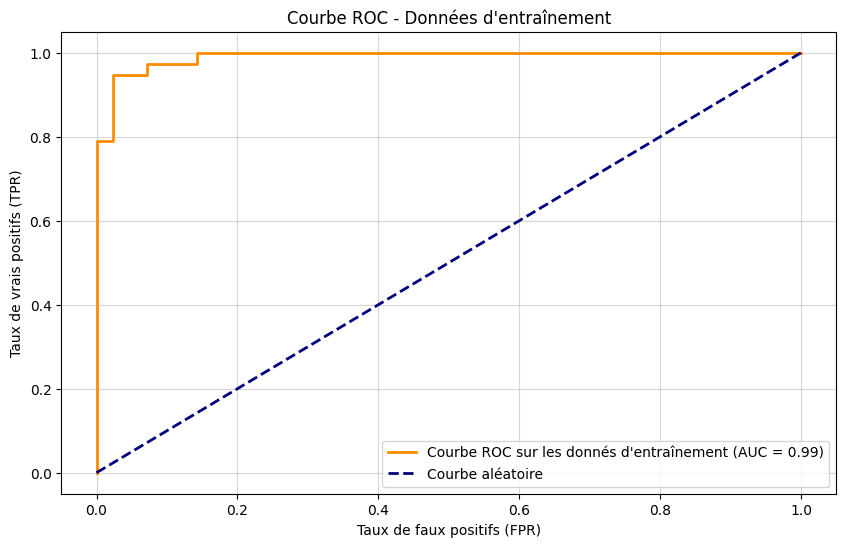

In [ ]:
#Prédictions sur les données d'entraînement
y_train_proba2 = model2.predict_proba(x_train2)[:,1]
y_train_pred2 = model2.predict(x_train2)
fpr_train2, tpr_train2, thresholds_train2 = roc_curve(y_train2, y_train_proba2)

#Matrice de confusion
cm_train2 = confusion_matrix(y_train2, y_train_pred2)

plt.figure(figsize=(8,6))
sns.heatmap(cm_train2, annot=True, fmt="d", cmap='Blues', xticklabels=["Non malade", "Malade"], yticklabels=["Non malade", "Malade"])
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.title("Matrice de confusion")
plt.show()

#Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_train2, y_train_pred2))

#Affichage d'une courbe ROC pour les données d'entraînement
fpr_train2, tpr_train2, thresholds_train2 = roc_curve(y_train2, y_train_proba2)
roc_auc_train2 = auc(fpr_train2, tpr_train2)

plt.figure(figsize=(10,6))
plt.plot(fpr_train2, tpr_train2, color='darkorange', lw=2, label=f"Courbe ROC sur les donnés d'entraînement (AUC = {roc_auc_train2:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle='--', label="Courbe aléatoire")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Données d'entraînement")
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()

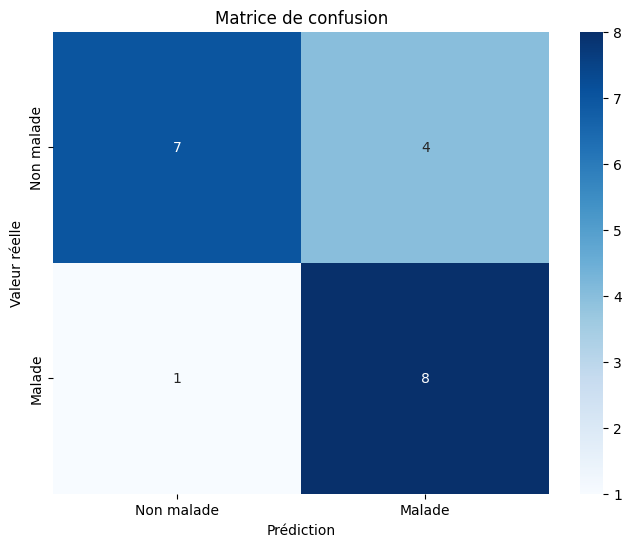


Rapport de classification :
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.67      0.89      0.76         9

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20



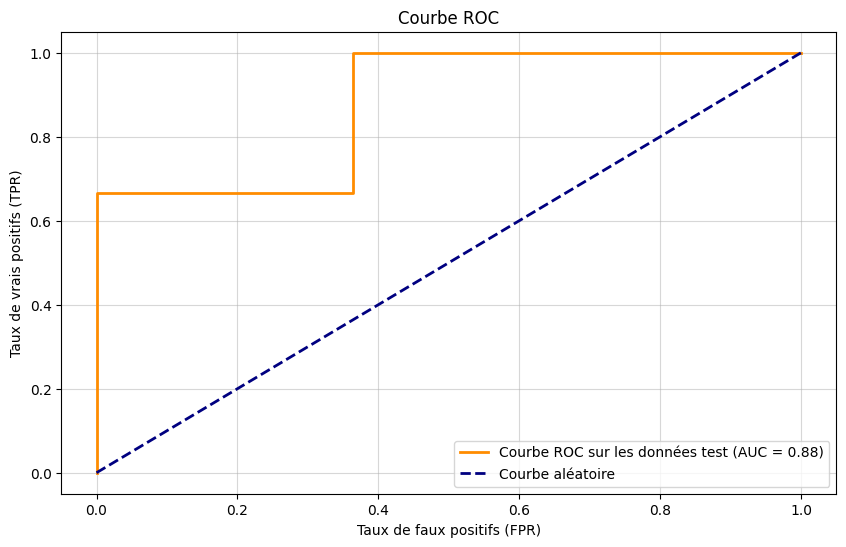

In [ ]:
#Prédictions sur les données test
y_test_pred2 = model2.predict(x_test2)
y_test_proba2 = model2.predict_proba(x_test2)[:,1]

#Matrice de confusion pour les données test
cm_test2 = confusion_matrix(y_test2, y_test_pred2)

plt.figure(figsize=(8,6))
sns.heatmap(cm_test2, annot=True, fmt="d", cmap='Blues', xticklabels=["Non malade", "Malade"], yticklabels=["Non malade", "Malade"])
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.title("Matrice de confusion")
plt.show()

print("\nRapport de classification :")
print(classification_report(y_test2, y_test_pred2))

#Affichage d'une courbe ROC pour les données test
fpr_test2, tpr_test2, thresholds_test2 = roc_curve(y_test2, y_test_proba2)
roc_auc_test2 = auc(fpr_test2, tpr_test2)

plt.figure(figsize=(10,6))
plt.plot(fpr_test2, tpr_test2, color='darkorange', lw=2, label=f"Courbe ROC sur les données test (AUC = {roc_auc_test2:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle='--', label="Courbe aléatoire")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()